Md. Irfan Hossain, Senior Program Officer, Data Analyst, GIRL Center, Population Council

#### Import required libraries and packages

In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns

#### Read data file as dataframe

In [2]:
df = pd.read_csv("audi.csv")

display(df.head())
display(df.tail())

,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
0,A1,2017,12500,Manual,15735,Petrol,150,55.4,1.4
1,A6,2016,16500,Automatic,36203,Diesel,20,64.2,2.0
2,A1,2016,11000,Manual,29946,Petrol,30,55.4,1.4
3,A4,2017,16800,Automatic,25952,Diesel,145,67.3,2.0
4,A3,2019,17300,Manual,1998,Petrol,145,49.6,1.0


,model,year,price,transmission,mileage,fuelType,tax,mpg,engineSize
10663,A3,2020,16999,Manual,4018,Petrol,145,49.6,1.0
10664,A3,2020,16999,Manual,1978,Petrol,150,49.6,1.0
10665,A3,2020,17199,Manual,609,Petrol,150,49.6,1.0
10666,Q3,2017,19499,Automatic,8646,Petrol,150,47.9,1.4
10667,Q3,2016,15999,Manual,11855,Petrol,150,47.9,1.4


#### Checking missing values, column types for consistancy

In [3]:
display(df.info())

<class 'pandas.core.frame.DataFrame'>
RangeIndex: 10668 entries, 0 to 10667
Data columns (total 9 columns):
 #   Column        Non-Null Count  Dtype  
---  ------        --------------  -----  
 0   model         10668 non-null  object 
 1   year          10668 non-null  int64  
 2   price         10668 non-null  int64  
 3   transmission  10668 non-null  object 
 4   mileage       10668 non-null  int64  
 5   fuelType      10668 non-null  object 
 6   tax           10668 non-null  int64  
 7   mpg           10668 non-null  float64
 8   engineSize    10668 non-null  float64
dtypes: float64(2), int64(4), object(3)
memory usage: 750.2+ KB


None

#### Creating a function to check columns

In [4]:
def check(data, column):
    df_count=data[column].value_counts()
    df_count = pd.DataFrame(df_count)
    df_count = df_count.reset_index()
    df_count = df_count.rename(columns={'index':column, column:'No_of_cars'})
    df_count['% of cars'] = np.round(((df_count['No_of_cars']/df_count['No_of_cars'].sum())*100), 2)
    return df_count

#### Checking the 'model' column

In [5]:
model_count = check(df, 'model')
display(model_count.head())

,model,No_of_cars,% of cars
0,A3,1929,18.08
1,Q3,1417,13.28
2,A4,1381,12.95
3,A1,1347,12.63
4,A5,882,8.27


#### Checking the 'year' column

In [6]:
year_count = check(df,'year')
display(year_count.head())

,year,No_of_cars,% of cars
0,2019,3197,29.97
1,2016,1964,18.41
2,2017,1935,18.14
3,2015,999,9.36
4,2018,864,8.10


#### We have to sort the year_count DataFrame based on 'year'

In [7]:
year_count = year_count.sort_values(by='year')
display(year_count)

,year,No_of_cars,% of cars
20,1997,1,0.01
19,1998,1,0.01
18,2002,2,0.02
16,2003,6,0.06
17,2004,5,0.05
15,2005,7,0.07
14,2006,9,0.08
13,2007,16,0.15
12,2008,21,0.20
11,2009,23,0.22


#### Checking the 'transmission' column

In [8]:
transmission_count = check(df,'transmission')
display(transmission_count)

,transmission,No_of_cars,% of cars
0,Manual,4369,40.95
1,Semi-Auto,3591,33.66
2,Automatic,2708,25.38


#### Checking the 'fuelType' column

In [9]:
fuelType_count = check(df,'fuelType')
display(fuelType_count)

,fuelType,No_of_cars,% of cars
0,Diesel,5577,52.28
1,Petrol,5063,47.46
2,Hybrid,28,0.26


#### Creating a function to show the number of cars for each unique value in a column using a barplot

In [10]:
def bar_plot(data, sub_plot, column_x, color, rotation, yticks):
    
    # create a barplot using seaborn
    sns.barplot(x=column_x, y='% of cars', data=data, color=color, alpha=0.75)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Percent of cars present for each " + column_x)
    
    # write proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel("Percent of cars (%)")
    
    # rotate the xticks if necessary
    plt.xticks(rotation=rotation)
    
    # provide a range for the yticks
    plt.yticks(yticks)

#### Plotting subplots to see at a glance how the four categorical variables affecting price

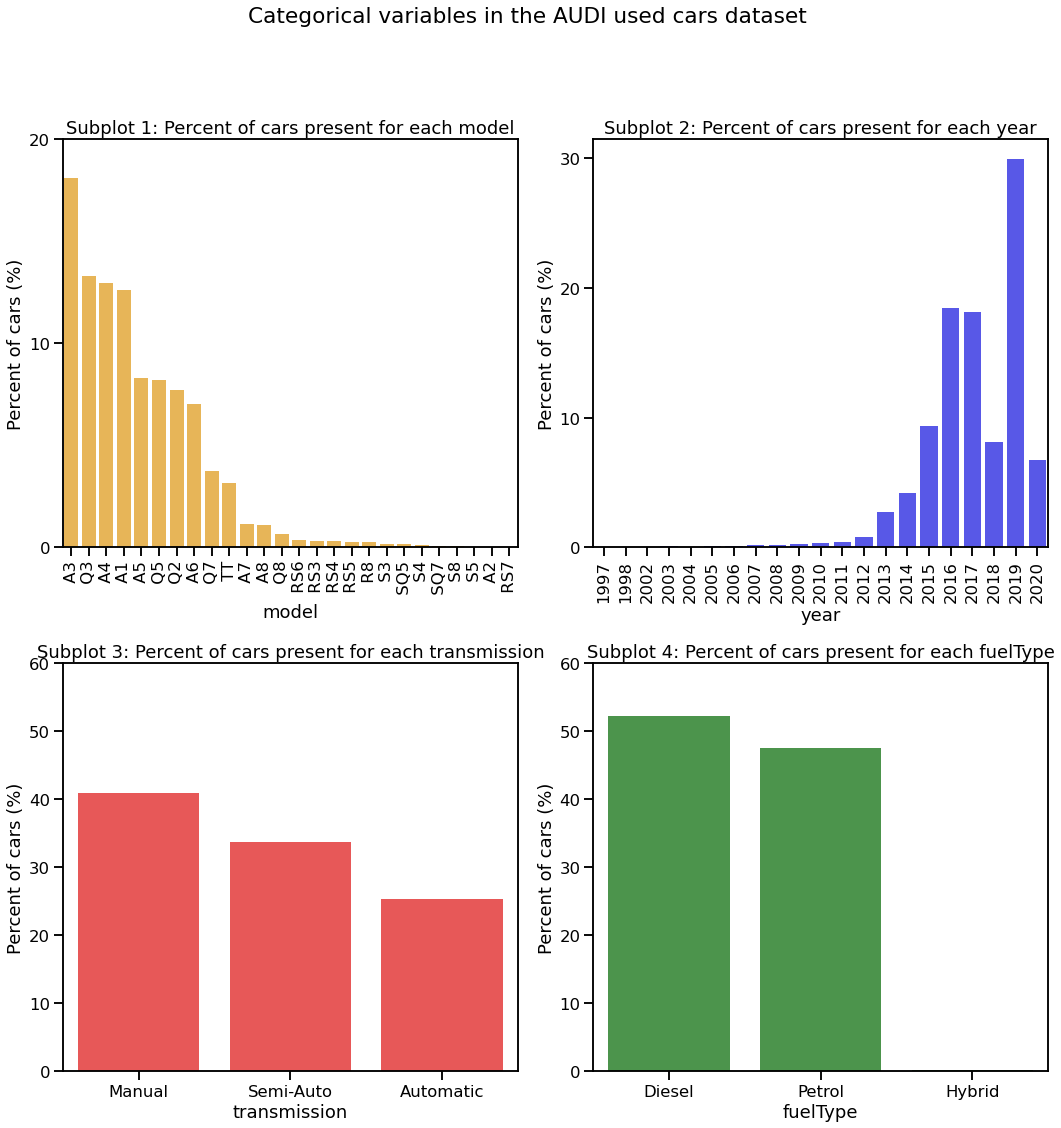

In [11]:
sns.set_context('talk')

plt.figure(figsize=(15,15))

# row 1, column 1
plt.subplot(2,2,1)
bar_plot(model_count, '1', 'model', 'orange', 90, np.arange(0,21,10))

# row 1, column 2
plt.subplot(2,2,2)
bar_plot(year_count, '2', 'year', 'blue', 90, np.arange(0,36,10))

# row 2, column 1
plt.subplot(2,2,3)
bar_plot(transmission_count, '3', 'transmission', 'red', 0, np.arange(0,61,10))

# row 2, column 2
plt.subplot(2,2,4)
bar_plot(fuelType_count, '4', 'fuelType', 'green', 0, np.arange(0,61,10))

# write the title for all the plots
plt.suptitle("Categorical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- From the subplot 1, we see that a major portion of these Audi cars belongs to model "A3" to "TT" - though other models are present but they are in negligible amount.
- Subplot 2 informs us that maximum cars were built from 2013 to 2020. Notable 30% cars were built in 2019.
- From the subplot 3, it is clear that major portion of the cars have manual type of transmission followed by semi-auto and automatic.
- Subplot 4 tells us half of these cars were run by diesel, followed by petrol. A negligible amount of cars are using hybrid type of fuel.

#### Creating a function to show scatterplot of the number of cars for each unique value in a column vs price to find whether there exists any relation

In [12]:
def scar_plot(data, sub_plot, column_x, column_y):
    
    # create a scatterplot using seaborn
    sns.scatterplot(x=column_x, y=column_y, data=data)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Price vs. " + column_x)
    
    # write proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel(column_y)

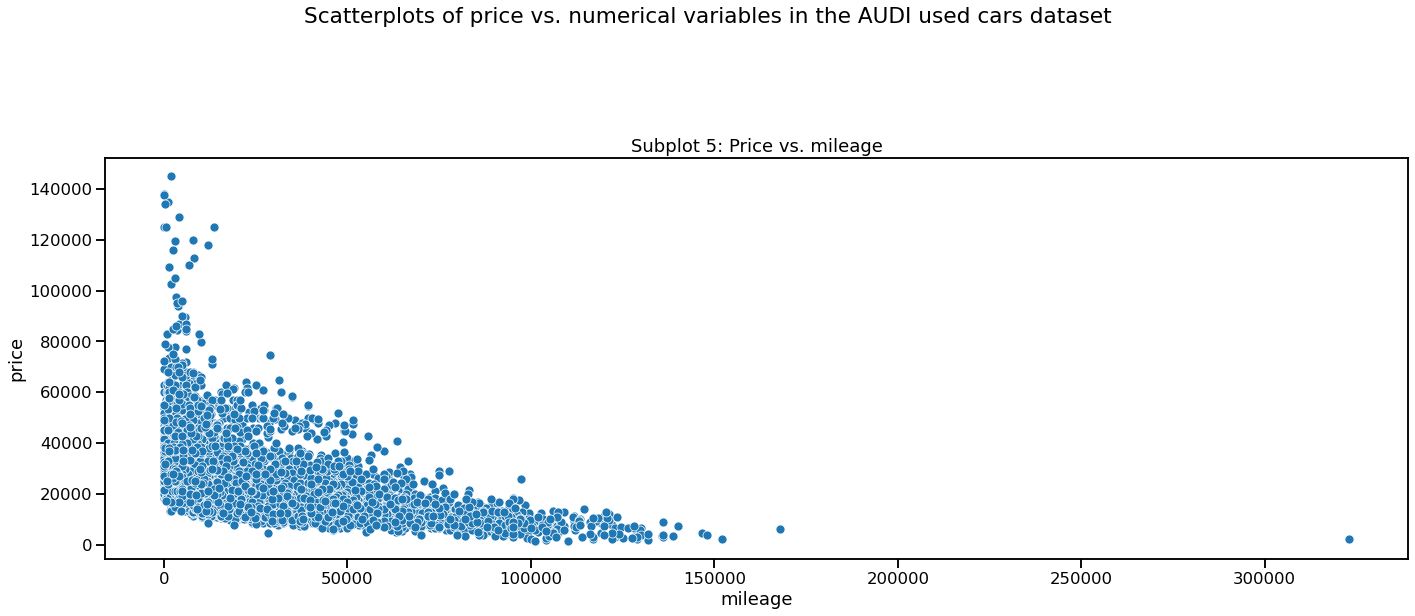

In [13]:
plt.figure(figsize=(20,20))

# Price vs mileage
plt.subplot(3,1,1)
scar_plot(df,'5','mileage','price')

# Price vs mpg
#plt.subplot(3,1,2)
#scar_plot(df,'6','mpg','price')

# Price vs engineSize
#plt.subplot(3,1,3)
#scar_plot(df,'7','engineSize','price')

# write the title for all the plots
plt.suptitle("Scatterplots of price vs. numerical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- The data have some extreme observations. In subplot 5 there is a curvilinear relationship between mileage and price. However discarding those we may assume the price decreases with increasing mileage.

#### Implementing a hue parameter in the function to see interlinkages between 3 variables

In [14]:
def scar_plot2(data, sub_plot, column_x, column_y, hue):
    
    # create a scatterplot using seaborn
    sns.scatterplot(x=column_x, y=column_y, data=data, hue=hue)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Price vs. " + column_x)
    
    # write proper label for the x and y axis
    plt.xlabel(column_x)
    plt.ylabel(column_y)

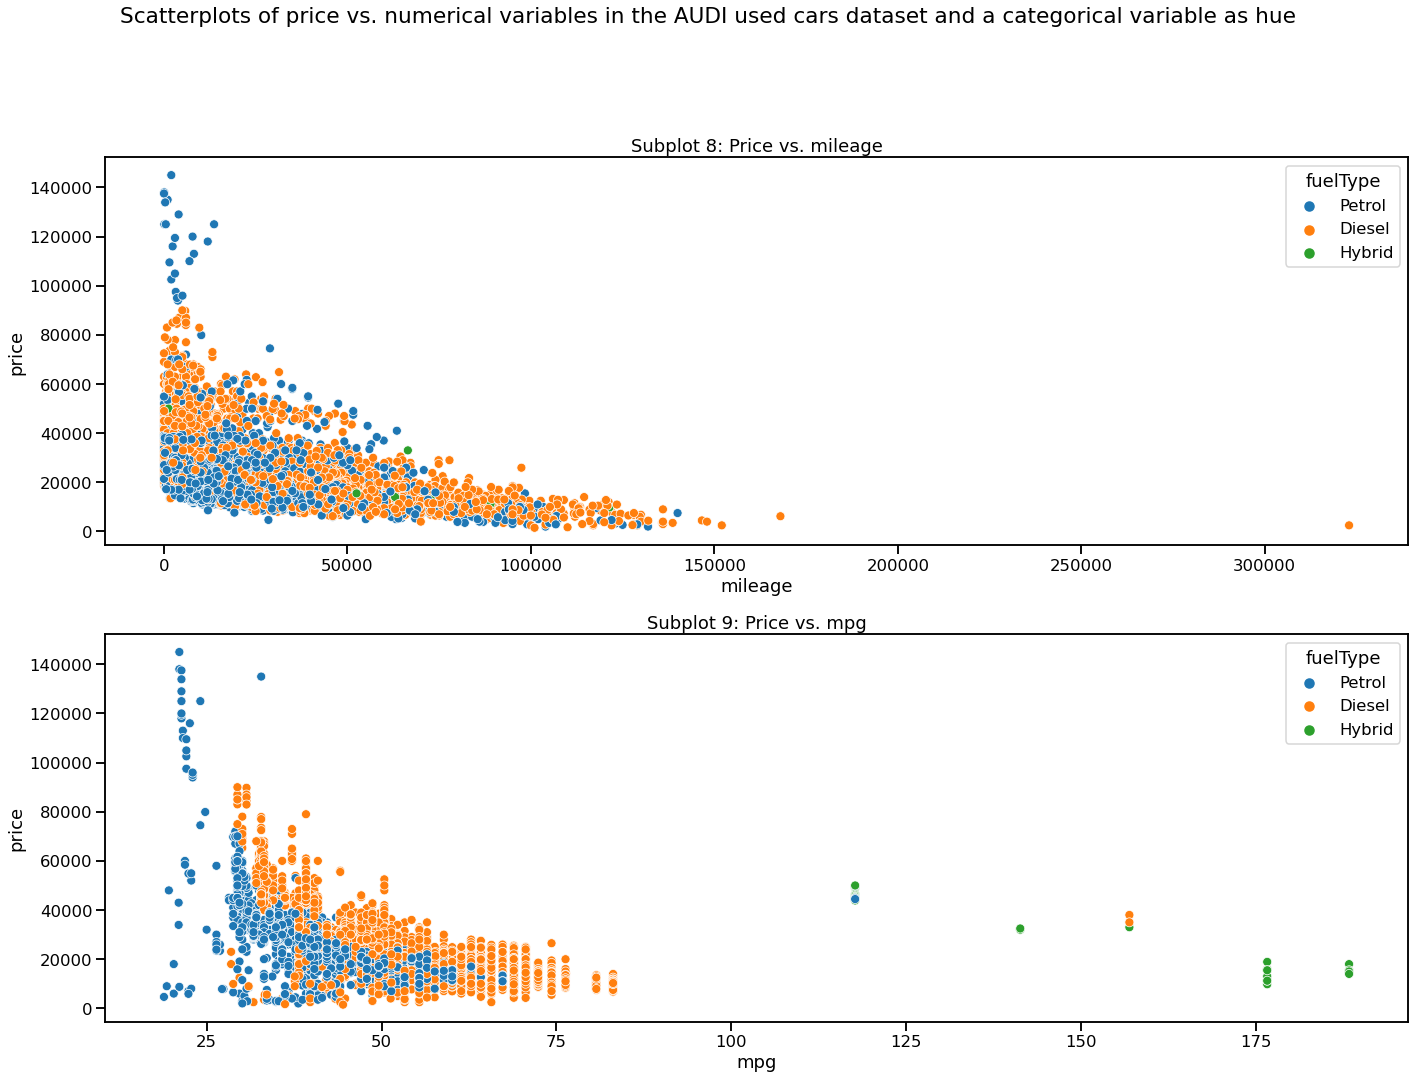

In [15]:
plt.figure(figsize=(20,20))

# Price vs mileage with fuelType as hue
plt.subplot(3,1,1)
scar_plot2(df,'8','mileage','price','fuelType')

# Price vs mpg with fuelType as hue
plt.subplot(3,1,2)
scar_plot2(df,'9','mpg','price','fuelType')

# Price vs engineSize with fuelType as hue
#plt.subplot(3,1,3)
#scar_plot2(df,'10','engineSize','price','fuelType')

# write the title for all the plots
plt.suptitle("Scatterplots of price vs. numerical variables in the AUDI used cars dataset and a categorical variable as hue", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- Subplot 8 informs us that for the cars that used diesel, there is a curvi-linear relation between mileage and price
- From subplot 9 it is clear that there is a few number of cars that used hybrid type of fuel and for those cars a contradictory findings is if mpg is high price is low. Most of petrol driven cars has low mpg and high price.

#### Using histogram to see the distribution of numerical variables in the dataset

In [16]:
def hist_plot(data, sub_plot, x, binw,color):
    
    # create a histogram using seaborn
    sns.histplot(data=data, x=x, binwidth=binw,kde=True, color=color, fill=False)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": Histogram of " + x)
    
    # write proper label for the x axis
    plt.xlabel(x)


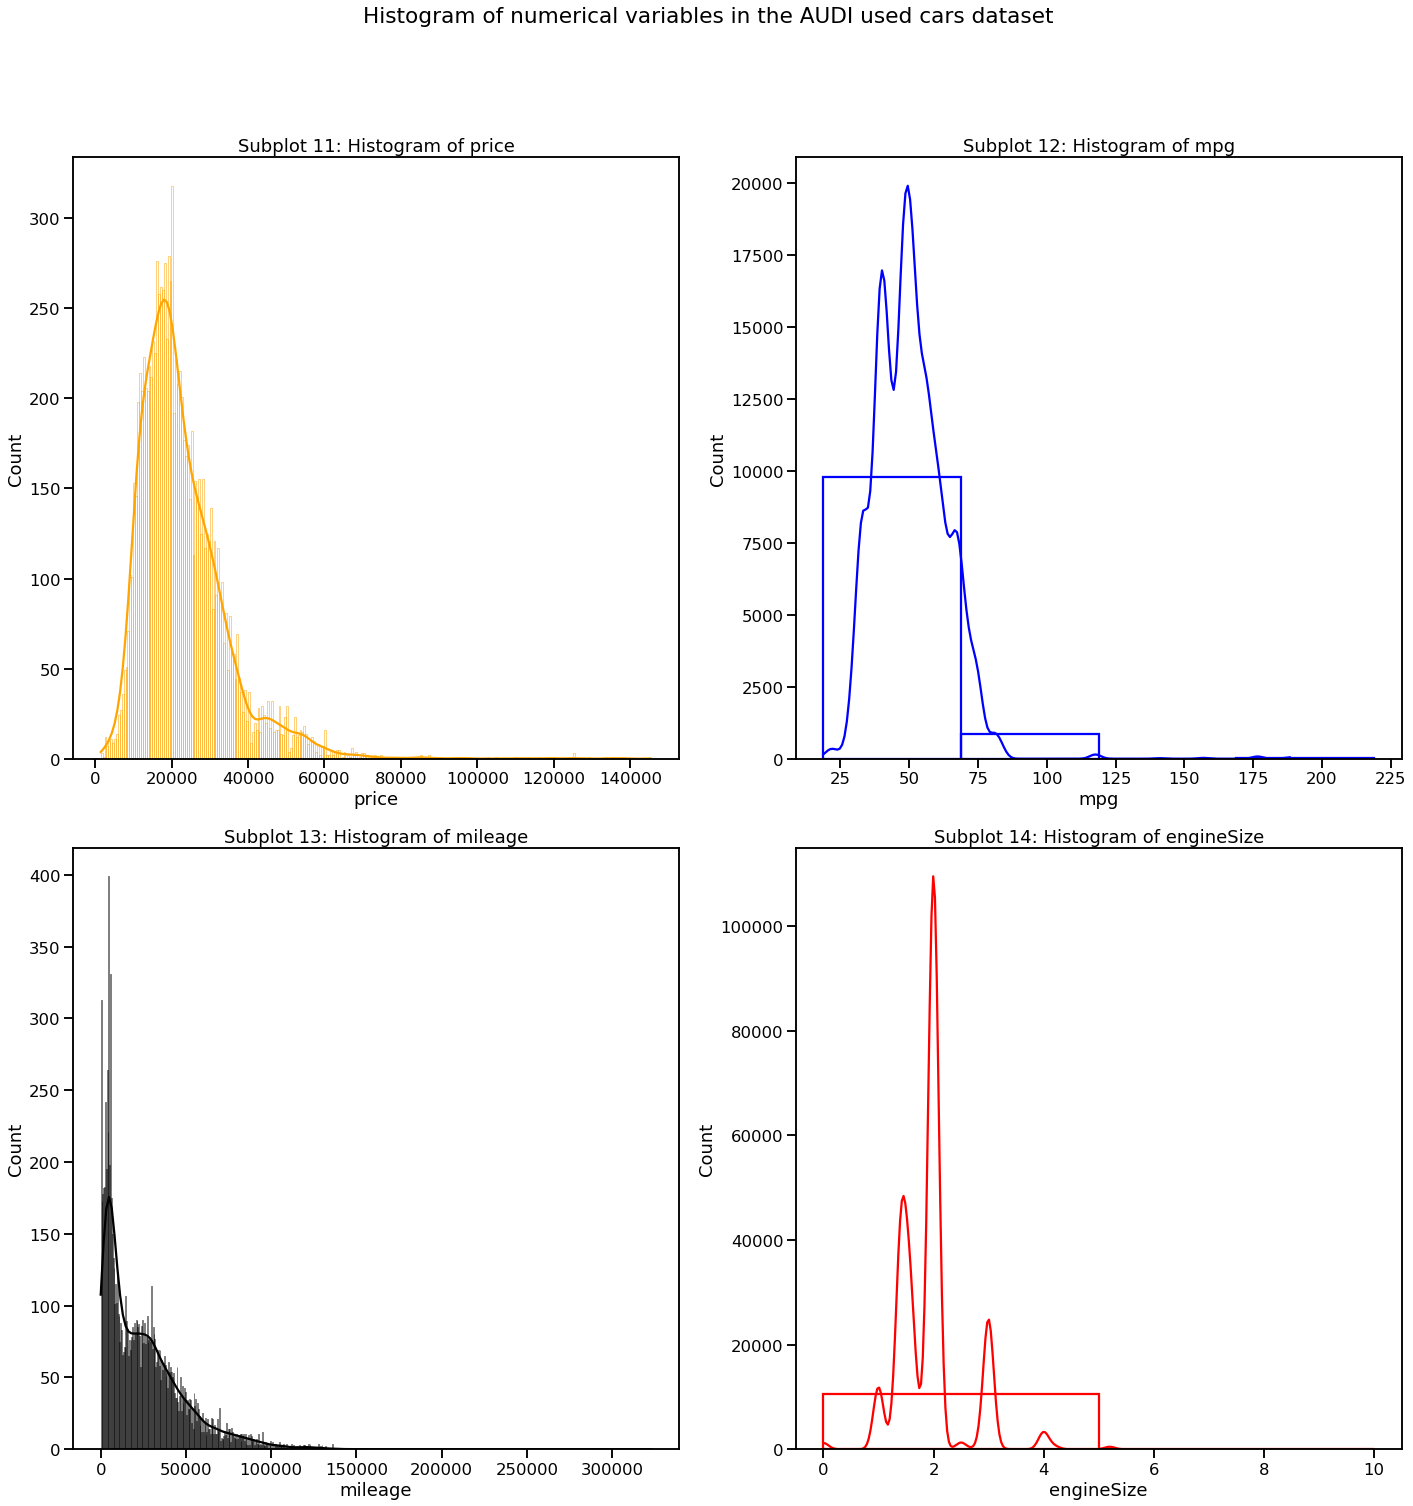

In [17]:
plt.figure(figsize=(20,20))

#histogram for price
plt.subplot(2,2,1)
hist_plot(data=df,sub_plot='11', x='price', binw=500, color='orange')

#histogram for mpg
plt.subplot(2,2,2)
hist_plot(data=df,sub_plot='12', x='mpg', binw=50, color='blue')

#histogram for mileage
plt.subplot(2,2,3)
hist_plot(data=df,sub_plot='13', x='mileage', binw=500, color='black')

#histogram for engineSize
plt.subplot(2,2,4)
hist_plot(data=df,sub_plot='14', x='engineSize', binw=5, color='red')


# write the title for all the plots
plt.suptitle("Histogram of numerical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- Subplot 11 shows almost normal curve it we consider price from 0-4000 USD, however some data points beyone 4000USD make this variable (price) to follow positively skewed distribution.
- Subplot 12 indicates mpg follows positively skewed distribution.
- Subplot 13 indicates mileage follows positively skewed distribution.
- Subplot 14 shows engineSize is more or lest normally distributed but its leptokurtic - that is variation from mean value 2 is low.

#### ECDF for numercial variables in the dataset

In [18]:
def ecdf_plot(data, sub_plot, x, binw,color):
    
    # create a histogram using seaborn
    sns.histplot(data=data, x=x, binwidth=binw, cumulative=True, stat='probability', color=color)
    
    # write a title for your plot
    plt.title("Subplot " + sub_plot + ": ECDF of " + x)
    
    # write proper label for the x axis
    plt.xlabel(x)

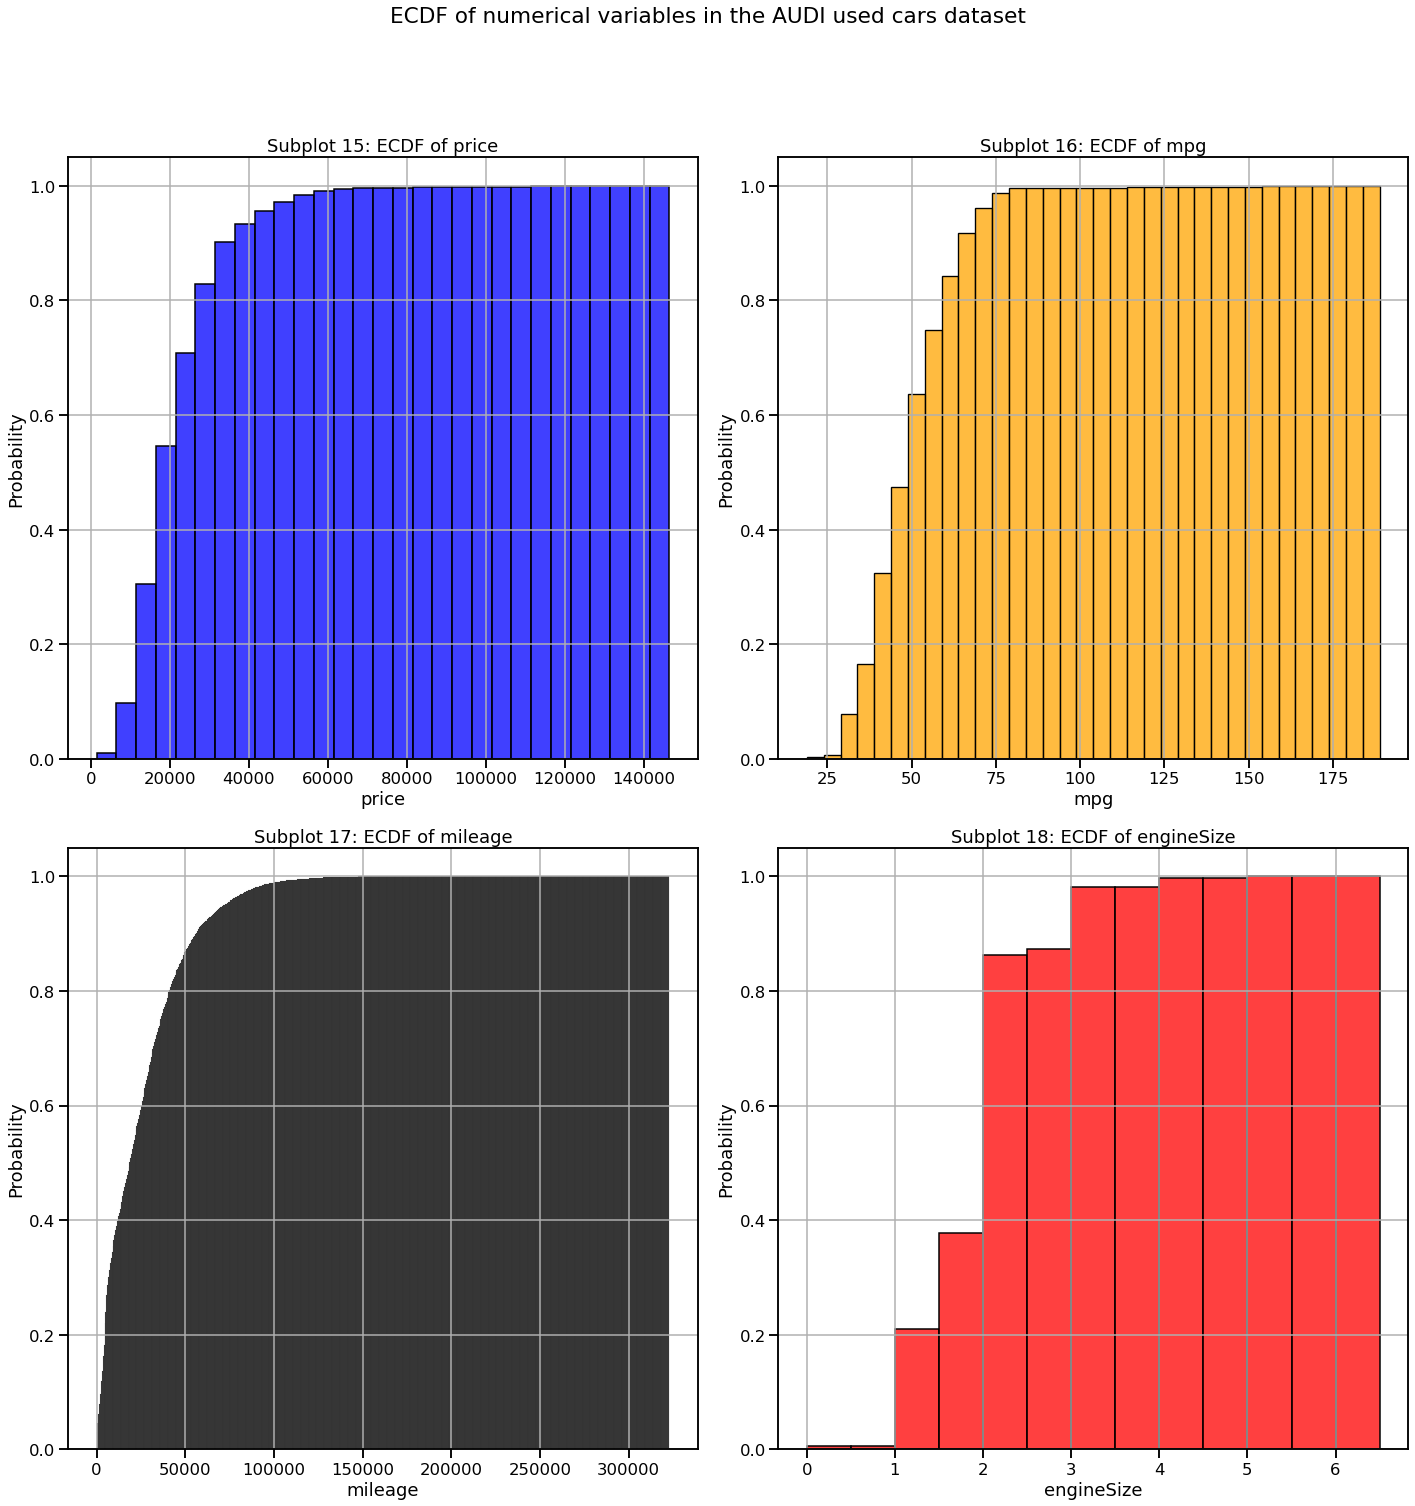

In [19]:
plt.figure(figsize=(20,20))

#ECDF for price
plt.subplot(2,2,1)
ecdf_plot(data=df,sub_plot='15', x='price', binw=5000, color='blue')
plt.grid()

#ECDF for mpg
plt.subplot(2,2,2)
ecdf_plot(data=df,sub_plot='16', x='mpg', binw=5, color='orange')
plt.grid()

#ECDF for mileage
plt.subplot(2,2,3)
ecdf_plot(data=df,sub_plot='17', x='mileage', binw=500, color='black')
plt.grid()

#ECDF for engineSize
plt.subplot(2,2,4)
ecdf_plot(data=df,sub_plot='18', x='engineSize', binw=0.5, color='red')
plt.grid()

# write the title for all the plots
plt.suptitle("ECDF of numerical variables in the AUDI used cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- From subplot 15, we observe that there is 55% probability that an used car of AUDI in this dataset has a price of 20000USD or less.
- Subplot 15 depicts us 50% of the used AUDI cars possess mpg 50 or less.
- In subplot 17, we see almost 90% of the AUDI used cars have mileage 50,000 miles or less.
- Subplot 18 provides us insight that there is less than 40% chance that AUDI used cars in this dataset have engine size of 2 or less.

#### Analysis using bar plots of numerical variables

###### Seperate numercial variables from the dataset

In [20]:
def sep_num_cols(dataframe):

    # create an empty list to keep the numeric columns
    num_cols = []

    # create a for loop to check the data types of all columns
    for col in dataframe.columns:
        if (dataframe[col].dtypes == 'int64') | (dataframe[col].dtypes == 'float64'):
            num_cols.append(col)
        
    return num_cols

In [21]:
#running the function and see the numerical variable names

num_cols = sep_num_cols(df)

print(num_cols)

['year', 'price', 'mileage', 'tax', 'mpg', 'engineSize']


#### Using loop to create box plot for numerical variables

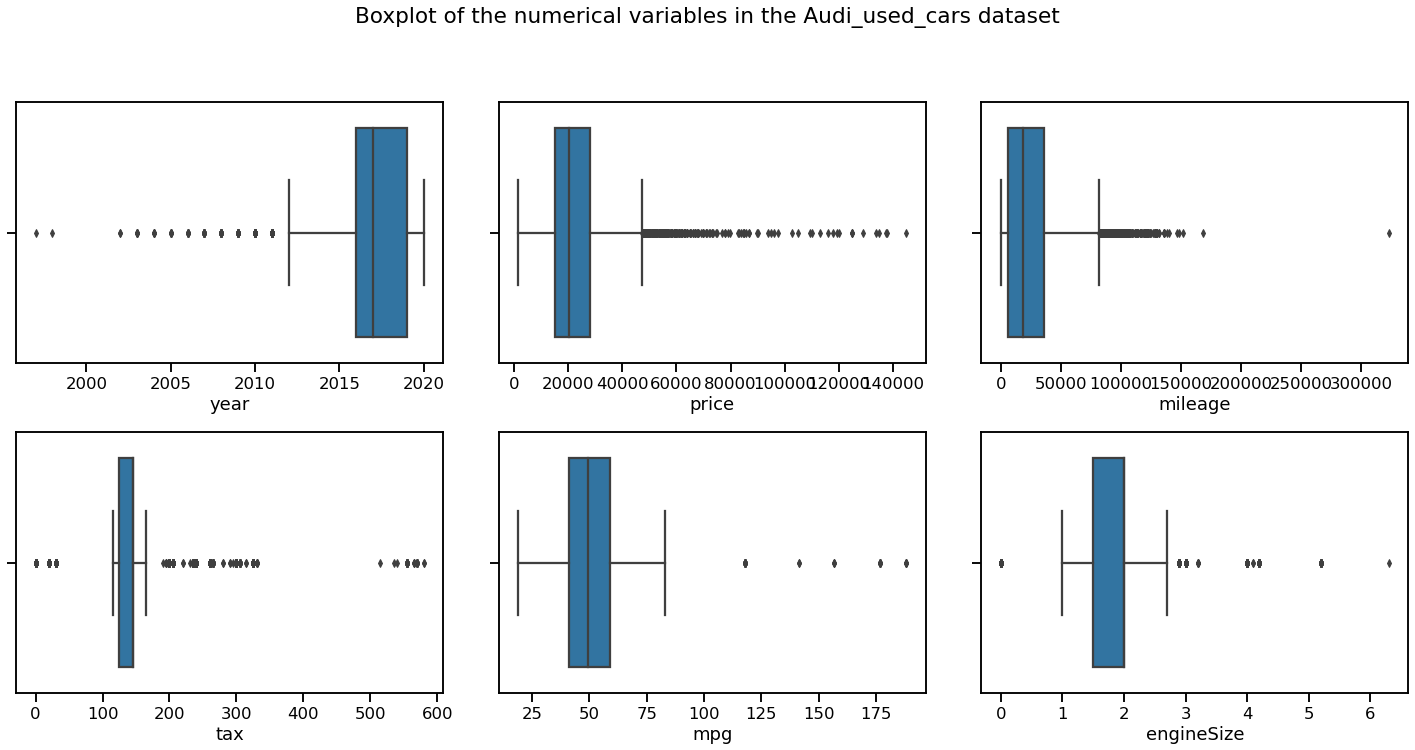

In [22]:
plt.figure(figsize=(20,10))
#using loop
for index in range(len(num_cols)):
    plt.subplot(2,3,index+1)
    sns.boxplot(x=df[num_cols[index]])
    
# write the title for all the plots
plt.suptitle("Boxplot of the numerical variables in the Audi_used_cars dataset", y=1.05)

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

- Boxplot of year variable reveals that 25% to 75% cars were built between 2016 & 2019 and 50% cars were built on 2017.
- Median price of these Audi used cars is 20,000 USD
- 75% of these cars have mileage below 50,000 miles.
- 50% Audi used cars in these dataset have 50 mpg
- 75% these cars have 2 Liter engine

#### Creating pivot tables 
    A. What are the top 5 selling car models in the dataset?
    B. What's the average selling price of the top 5 selling car models?
    C. What's the total sale of the top 5 selling car models?

In [23]:
# Defining a function to generate pivot table
def pivot1(data,x,y):
    df_pivot_x = pd.pivot_table(df, index=x, values=y, aggfunc=['count', 'mean', 'sum'])
    return df_pivot_x

In [24]:
# Creating pivot_table based on model
df_pivot_model=pivot1(data=df,x='model',y='price')
display(df_pivot_model)

,count,mean,sum
,price,price,price
model,,,
A1,1347,14327.750557,19299480
A2,1,2490.000000,2490
A3,1929,17408.522032,33581039
A4,1381,20255.450398,27972777
A5,882,23577.114512,20795015
A6,748,22695.385027,16976148
A7,122,28865.516393,3521593
A8,118,34981.847458,4127858


In [25]:
# Sorting by count
df_pivot_model_sorted=df_pivot_model.sort_values(('count','price'), ascending=False)
display(df_pivot_model_sorted.head(5))

,count,mean,sum
,price,price,price
model,,,
A3,1929,17408.522032,33581039
Q3,1417,22999.261821,32589954
A4,1381,20255.450398,27972777
A1,1347,14327.750557,19299480
A5,882,23577.114512,20795015


**Comment**: 
<br> A. In this dataset the top 5 selling car models of Audi brand are: **A3**, **Q3**, **A4**, **A1**, and **A5**
<br> B. The average selling price of the top 5 selling car models are: USD **17,409 (A3)**, **22,999 (Q3)**, **20,255 (A4)**, **14,328 (A1)** and **23577 (A5)**
<br>  C. The total sale of the top 5 selling car models are: $ **34 million (A3)**, **33 million (Q3)**, **28 million (A4)**, **19 million (A1)** and **21 million (A5)**

In [26]:
# Creating pivot_table based on transmission
df_pivot_trans = pivot1(data=df,x='transmission',y='price')

# Sorting by count
df_pivot_trans_sorted=df_pivot_trans.sort_values(('count','price'), ascending=False)
display(df_pivot_trans_sorted.head())

,count,mean,sum
,price,price,price
transmission,,,
Manual,4369,16101.033417,70345415
Semi-Auto,3591,27161.781676,97537958
Automatic,2708,28204.750000,76378463


**Comment**: 
<br> A. In this dataset the top selling car models of Audi brand on the basis of transmission is : **Manual**
<br> B. The average selling price of the top selling Audi branded car of **Manual transmission** models is: USD **16,101**
<br>  C. The total sale of the top selling Audi branded car of **Manual transmission** models is: USD **70 million**

In [27]:
# Creating pivot_table based on type of fuel
df_pivot_ft = pivot1(data=df,x='fuelType',y='price')
# Sorting by count
df_pivot_ft_sorted=df_pivot_ft.sort_values(('count','price'), ascending=False)
display(df_pivot_ft_sorted.head())

,count,mean,sum
,price,price,price
fuelType,,,
Diesel,5577,23237.516227,129595628
Petrol,5063,22480.908355,113820839
Hybrid,28,30191.750000,845369


**Comment**: 
<br> A. In this dataset the top selling car models of Audi brand on the basis of type of fuel is : **Diesel**
<br> B. The average selling price of the top selling Audi branded car of **Diesel** fuel typed models is: USD **23,237**
<br>  C. The total sale of the top selling Audi branded car of  **Diesel** fuel typed models is: USD **129 million**

### Creating barplots based on model, transmission, and Type of fuel focusing for -
    A. What are the top 5 selling car models in the dataset?
    B. What's the average selling price of the top 5 selling car models?
    C. What's the total sale of the top 5 selling car models?

In [28]:
#To answer the above questions we have to process the dataframe created by pivot table

def agg1(data,x,y):
    # create a dataframe based upon Y grouped by X
    df_agg = data.groupby(x)[y].agg(['count', 'mean', 'sum'])
    # Sort by Count
    df_agg = df_agg.sort_values(by='count', ascending=False)
    # Create a column of percentage of the cars in each X
    df_agg['percent_of_cars'] = (df_agg['count']/df_agg['count'].sum())*100
    # convert the 'sum' column in millions
    df_agg['sum'] = df_agg['sum']/1000000
    # keep up to two decimal points
    df_agg = df_agg.round(2)
    return df_agg

df_agg_model = agg1(df,'model','price')
display(df_agg_model)

df_agg_tran = agg1(df,'transmission','price')
display(df_agg_tran)

df_agg_ft = agg1(df,'fuelType','price')
display(df_agg_ft)

,count,mean,sum,percent_of_cars
model,,,,
A3,1929,17408.52,33.58,18.08
Q3,1417,22999.26,32.59,13.28
A4,1381,20255.45,27.97,12.95
A1,1347,14327.75,19.30,12.63
A5,882,23577.11,20.80,8.27
Q5,877,30445.69,26.70,8.22
Q2,822,22516.98,18.51,7.71
A6,748,22695.39,16.98,7.01
Q7,397,44788.32,17.78,3.72


,count,mean,sum,percent_of_cars
transmission,,,,
Manual,4369,16101.03,70.35,40.95
Semi-Auto,3591,27161.78,97.54,33.66
Automatic,2708,28204.75,76.38,25.38


,count,mean,sum,percent_of_cars
fuelType,,,,
Diesel,5577,23237.52,129.60,52.28
Petrol,5063,22480.91,113.82,47.46
Hybrid,28,30191.75,0.85,0.26


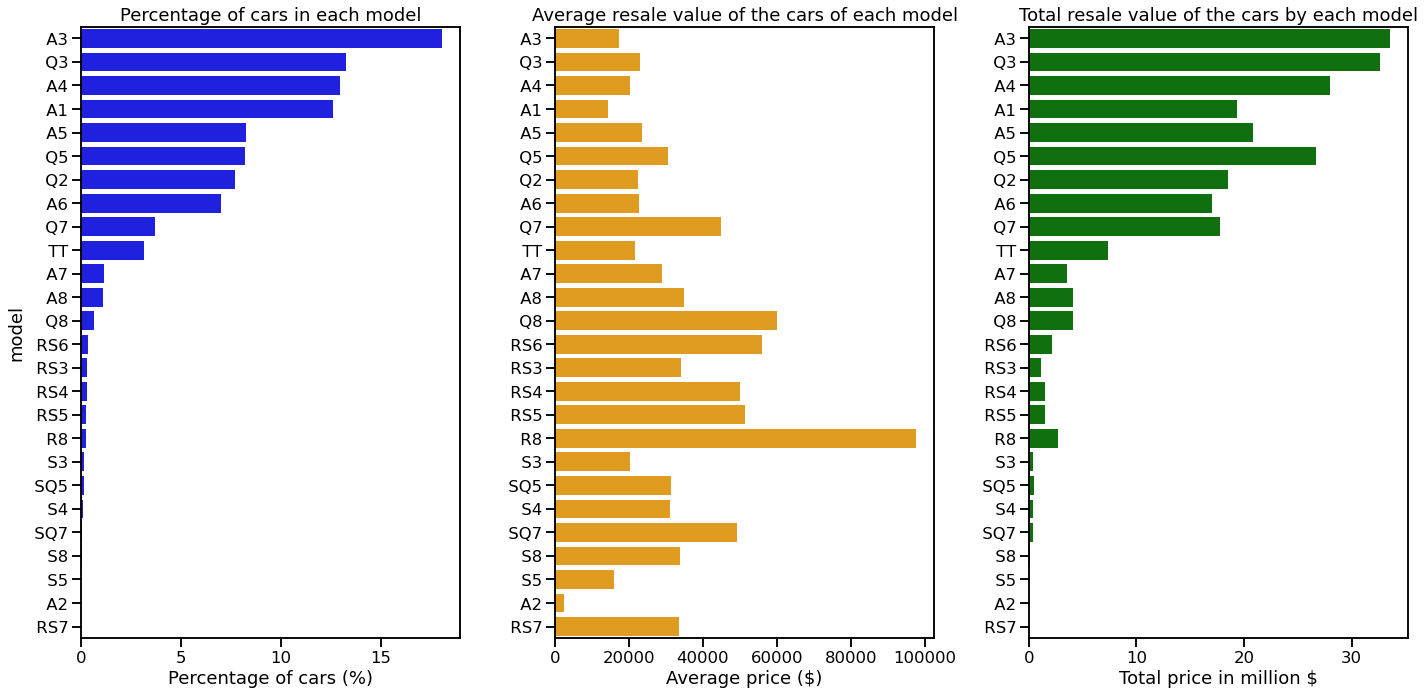

In [29]:
plt.figure(figsize=(20,10))

#Barplot for model
plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_model.index, data=df_agg_model, orient='h', color='blue')
plt.title("Percentage of cars in each model")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_model.index, data=df_agg_model, orient='h', color='orange')
plt.title("Average resale value of the cars of each model")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_model.index, data=df_agg_model, orient='h', color='green')
plt.title("Total resale value of the cars by each model")
plt.xlabel("Total price in million $")
plt.ylabel("")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

**Comment**: 
<br> The result from the above barplots also coincides with our fidings from pivot table outputs earlier
<br> A. In this dataset the top 5 selling car models of Audi brand are: **A3**, **Q3**, **A4**, **A1**, and **A5**
<br> B. The average selling price of the top 5 selling car models are less then **25K USD**
<br> C. The total sale of the top 5 selling car models are: for **A3** and **Q3**, total sales are between USD 30 to 35 millions for the other 3 models - total sales are between USD 20 to 30 millions

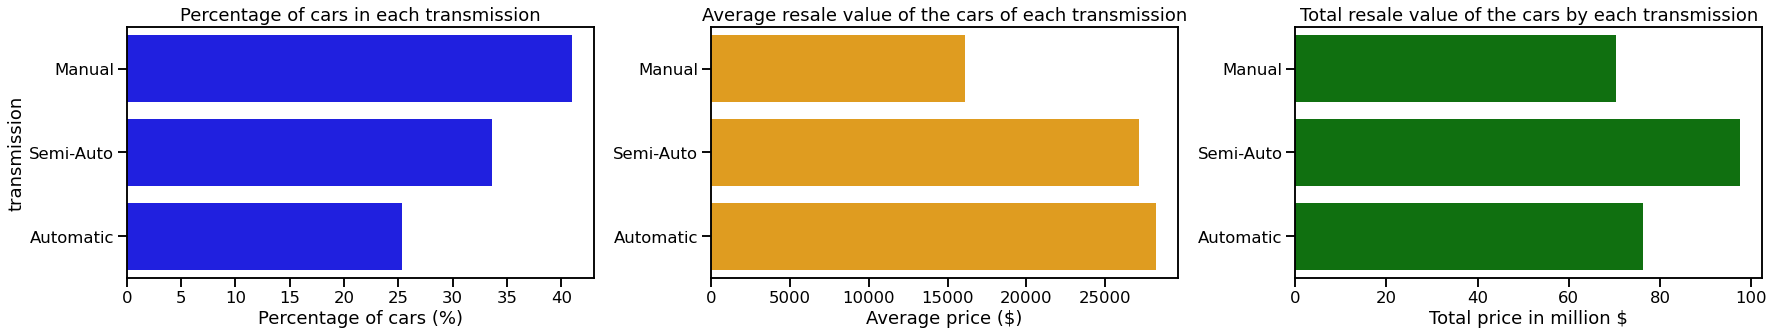

In [30]:
plt.figure(figsize=(25,5))

#Barplot for transmission
plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_tran.index, data=df_agg_tran, orient='h', color='blue')
plt.title("Percentage of cars in each transmission")
plt.xlabel("Percentage of cars (%)")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_tran.index, data=df_agg_tran, orient='h', color='orange')
plt.title("Average resale value of the cars of each transmission")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_tran.index, data=df_agg_tran, orient='h', color='green')
plt.title("Total resale value of the cars by each transmission")
plt.xlabel("Total price in million $")
plt.ylabel("")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

**Comment**: 
<br> The results from the above barplots inform that there are only three types of transmission model available for Audi branded used car. Hence we will emphasis on top category.
<br> A. In this dataset the top models of Audi brand used car on the basis of tranmission is : **Manual** (40%)
<br> B. The average selling price of the top selling **Manual transmission** model based Audi used cars is around **15K USD**
<br> C. The total sale of the top selling **Manual transmission** model based Audi used cars is between USD 70 to 80 millions

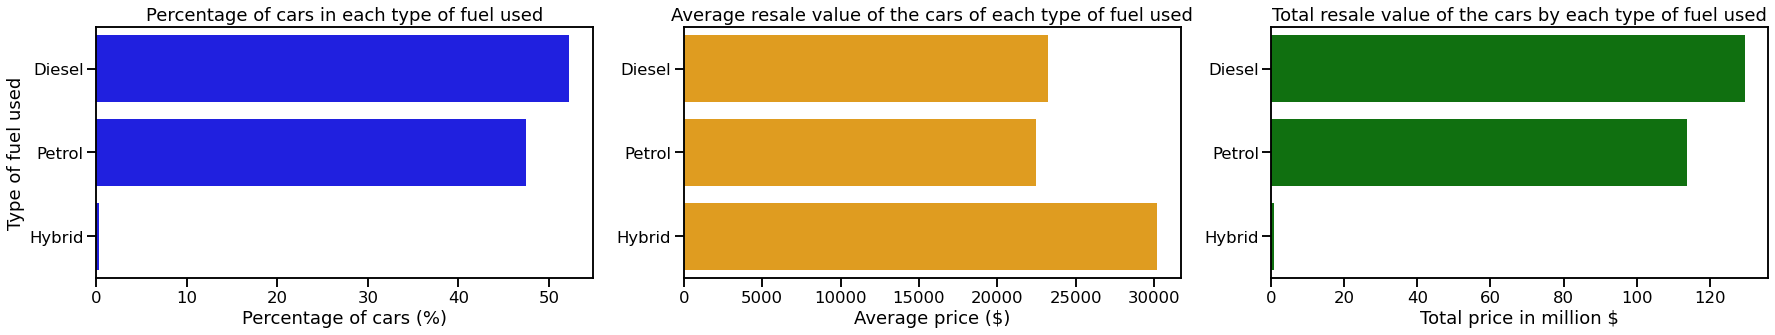

In [31]:
plt.figure(figsize=(25,5))

#Barplot for Type of fuel
plt.subplot(1, 3, 1)
sns.barplot(x='percent_of_cars', y=df_agg_ft.index, data=df_agg_ft, orient='h', color='blue')
plt.title("Percentage of cars in each type of fuel used")
plt.xlabel("Percentage of cars (%)")
plt.ylabel("Type of fuel used")

plt.subplot(1, 3, 2)
sns.barplot(x='mean', y=df_agg_ft.index, data=df_agg_ft, orient='h', color='orange')
plt.title("Average resale value of the cars of each type of fuel used")
plt.xlabel("Average price ($)")
plt.ylabel("")

plt.subplot(1, 3, 3)
sns.barplot(x='sum', y=df_agg_ft.index, data=df_agg_ft, orient='h', color='green')
plt.title("Total resale value of the cars by each type of fuel used")
plt.xlabel("Total price in million $")
plt.ylabel("")

# keep the individual plots separate from each other
plt.tight_layout()

# display the plots
plt.show()

**Comment**: 
<br> The results from the above barplots inform that there are only three types of model on the basis of type of fuel used available for Audi branded used car. Hence we will emphasis on top category.
<br> A. In this dataset the top models of Audi brand used car on the basis of type of fuel is : **Diesel** (more than 50%)
<br> B. The average selling price of the top selling **Diesel** fuel typed model based Audi used cars is around **23K USD**
<br> C. The total sale of the top selling **Diesel** fuel typed model based Audi used cars is more than USD 120 millions